<a href="https://colab.research.google.com/github/njones5714/My-notebook/blob/main/Copy_of_DSRP_Day_8_Lab_Notebook_%5BSTUDENT%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 8: K-Nearest Neighbors**
---

### **Description**
In this lab, you will implement KNN (K-Nearest Neighbors) models. KNNs are a popular machine learning algorithm used for classification and regression tasks. Through this lab, you'll gain hands-on experience in building and training KNN models and using them to make accurate predictions. You'll get to see firsthand how KNN models work and how they can be used to solve real-world problems.

<br>

### **Structure**
**Part 1**: [Breast Cancer Dataset](#p1)

**Part 2**: [Spotify Dataset](#p2)

**Part 3**: [Australia Dataset](#p3)

**Part 4**: [[OPTIONAL] Homework Practice](#p4)
>
> **Part 4.1**: [Zoo Animal Classification Dataset](#p4.1)
>
> **Part 4.2**: [Classifying Stars](#p4.2)
>
> **Part 4.3**: [RGB Color Classification](#p4.3)


<br>

### **Learning Objectives**
By the end of this lab, we will:
* Recognize how to implement KNN models with sklearn.
* Recognize how to evaluate KNN models with sklearn.

<br>

### **Resources**
* [K-Nearest Neighbors with sklearn](https://docs.google.com/document/d/1rKyjjnRe5dq3StxXS03n6iXfJvTN7dJNJjWVGdCu6cM/edit?usp=sharing)

* [pandas Commands](https://docs.google.com/document/d/1pLCyzig38Mop0Iib021X47S25WBEqZCWf7LRdpC8hGw/edit?usp=drive_link)

* [Data Visualizations with matplotlib](https://docs.google.com/document/d/1tCKyB_E2A-S_rwTIN6JHE9lCQiK4DLTQTt25Lc-uQcs/edit?usp=drive_link)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, metrics

<a name="p1"></a>

---
## **Part 1: Breast Cancer Dataset**
---

#### **About the Dataset**
Breast cancer is one of the most common types of cancer in women. Each year in the United States, about 264,000 women are diagnosed with breast cancer. The abilty to detect it early is extremely important. The following dataset is taken from the [UCI ML Breast Cancer Wisconsin (Diagnostic) dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)). The dataset contains mammography exam results and whether or not cancer was detected.

The features are as follows:
* `radius`
* `texture`: standard deviation of gray-scale values
* `perimeter`
* `area`
* `smoothness`: local variations in radius lengths
* `compactness`: perimeter^2 / area - 1
* `concavity`: severity of concave portions of the contour
* `concave points`: number of concave portions of the contour
* `symmetry`
* `fractal dimension`: "coastline approximation" - 1

Note: There is data recorded for the mean, standard error, and worst (or largest) for each feature, resulting in 30 total features.

<br>

#### **Your Task**
Using the Breast Cancer dataset, we will do the following:
* Create a KNN classifier model that can be used to predict whether or not a patient has breast cancer.
* Use the model to predict whether or not patient have breast cancer based on various mean radii and mean textures.

<br>



#### **Step #1: Load the data**

Load in the `Breast Cancer Dataset`. You may refer to this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).


In [ ]:
cancer_dataset = datasets.load_breast_cancer()
df = pd.DataFrame(data = cancer_dataset.data, columns = cancer_dataset.feature_names)
df["Target"] = cancer_dataset.target

#### **Step #2: Decide independent and dependent variables**

Complete the cell below to select our features and label. In particular, we will fit our classifier using the `"mean radius"` and `"mean texture"` features in order to predict whether the patient has breast cancer.

In [ ]:
features = df[["mean radius", "mean texture"]]# COMPLETE THIS CODE
label = df["Target"]# COMPLETE THIS CODE

#### **Before we continue our steps, let's visualize our data.**

Create a scatterplot that visualizes the correlation between your features.

In [ ]:
in

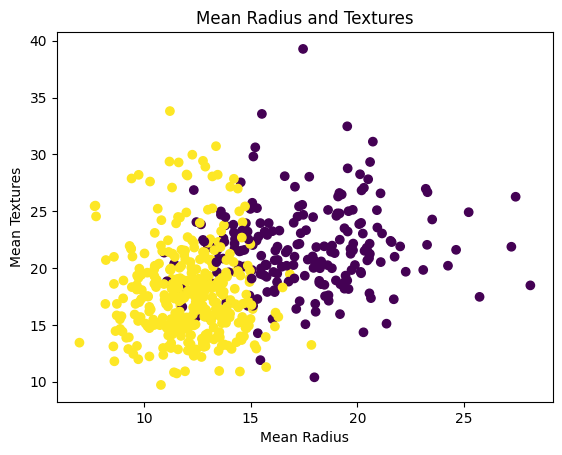

In [ ]:
# COMPLETE THIS CODE
scatter = plt.scatter(df["mean radius"], features["mean texture"], c = label)
plt.title("Mean Radius and Textures")
plt.xlabel("Mean Radius")
plt.ylabel("Mean Textures")

plt.show()

#### **Step #3: Split data into training and testing data**

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size= 0.3, random_state = 42)# COMPLETE THIS CODE

#### **Step #4: Import the KNN algorithm**

**Run the code below to complete this step.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### **Step #5: Initialize the model and set hyperparameters**


Let's set the *hyperparameter* `n_neighbors = 5`.

In [ ]:
model = KNeighborsClassifier(n_neighbors = 5)# COMPLETE THIS CODE

#### **Step #6: Fit your model and make predictions on the test set. Create a visualization if applicable.**

In [ ]:
# COMPLETE THIS CODE
model.fit(X_train, y_train)

# predict model
pred = model.predict(X_test)


#### **Create a visualization**

**Run the code below to visualize the decision boundary of this KNN model.**


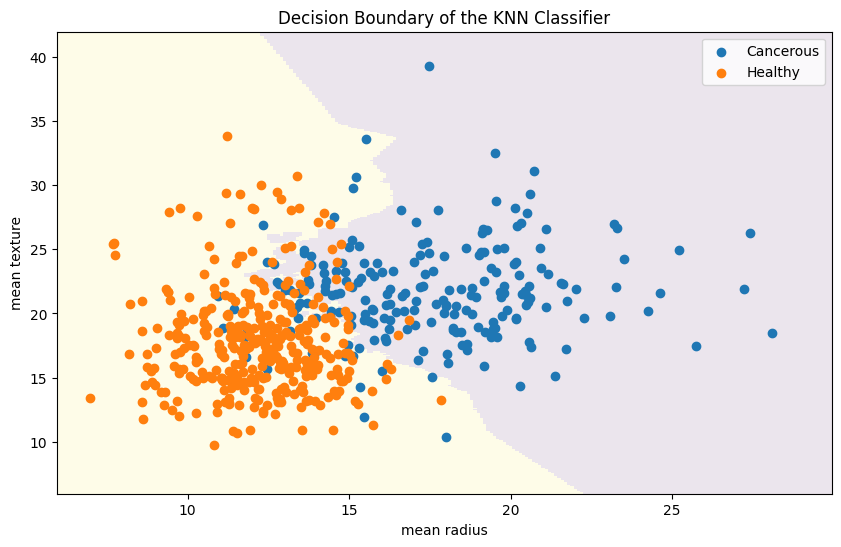

In [ ]:
# Make the same scatter plot of the training data

fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(6, 30, 0.1),
                     np.arange(6, 42, 0.1))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in df.groupby("Target"):
  ax.scatter(data["mean radius"], data["mean texture"], label=["Cancerous","Healthy"][label])

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.legend()
plt.show()

#### **Wait for your instructor to continue.**

#### **Step #7: Evaluate your model**

Print the accuracy and confusion matrix for your model's performance on the test set.

<br>

**NOTE**: Here you can use `["Cancerous","Healthy"]` for the `display_labels` argument.

In [ ]:
print("Accuracy Score: ", metrics.accuracy_score(y_test, pred)) # COMPLETE THIS CODE

Accuracy Score:  0.8771929824561403


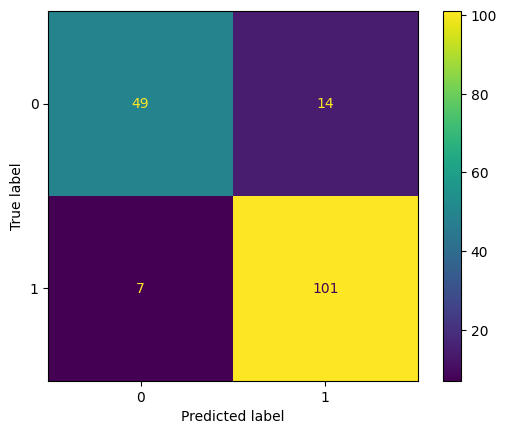

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred)# COMPLETE THIS CODE

#### **Step #8: Use the model**

Predict whether the following patients have cancer or not:

1. Is a patient with mean radius `15.5` and mean texture `31.2` likely to have cancer?
2. Is a patient with mean radius `12.2` and mean texture `34.5` likely to have cancer?



In [ ]:
patient1 = pd.DataFrame([[15.5, 31.2]], columns=["mean radius", "mean texture"])

prediction1 = model.predict(patient1)[0]# COMPLETE THIS CODE

print("Patient 1 " + str(['is likely', 'is not likely'][prediction1]) + " to have cancer")

Patient 1 is not likely to have cancer


In [ ]:
patient2 = pd.DataFrame([[12.2, 34.5]], columns = ["mean radius", "mean texture"]) # COMPLETE THIS CODE

prediction2 = model.predict(patient2)[0] # COMPLETE THIS CODE

print("Patient 2 " + str(['is likely', 'is not likely'][prediction2]) + " to have cancer")

Patient 2 is not likely to have cancer


### **Reflection question**
Answer the following question: In the case of predicting breast cancer, do you think it's more important to reduce false positives or false negatives?

### **Hyperparameter Tuning [OPTIONAL]**

Run the given code below to find the optimal k for our model. What is this k?

{1: np.float64(92.98245614035088), 3: np.float64(92.98245614035088), 5: np.float64(95.6140350877193), 7: np.float64(95.6140350877193), 9: np.float64(95.6140350877193), 11: np.float64(98.24561403508771), 13: np.float64(97.36842105263158), 15: np.float64(96.49122807017544), 17: np.float64(96.49122807017544), 19: np.float64(96.49122807017544), 21: np.float64(96.49122807017544), 23: np.float64(95.6140350877193), 25: np.float64(94.73684210526315), 27: np.float64(94.73684210526315), 29: np.float64(94.73684210526315), 31: np.float64(94.73684210526315), 33: np.float64(94.73684210526315), 35: np.float64(94.73684210526315), 37: np.float64(94.73684210526315), 39: np.float64(94.73684210526315), 41: np.float64(94.73684210526315), 43: np.float64(94.73684210526315), 45: np.float64(94.73684210526315), 47: np.float64(94.73684210526315), 49: np.float64(94.73684210526315)}


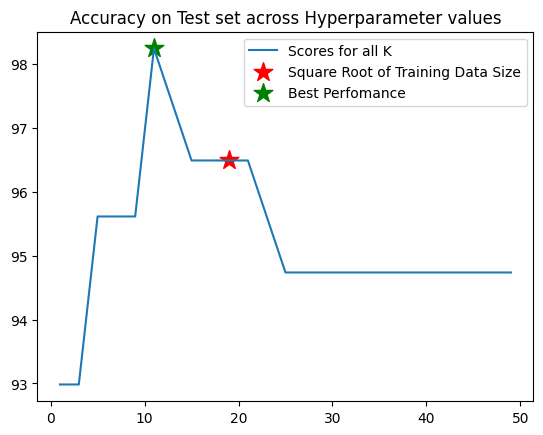

Top score of optimal classifier: 98.24561403508771
Best Value of K to use 11


In [ ]:
# Now lets see how accurate it is looking at all 30 variables

# Load all columns of the dataset
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(columns="Target"), df[["Target"]],
                                      test_size=0.2, random_state=42)

# Hyperparameter tuning
scores = {}
for n in range(1,50,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')

# ADDING THE PERFORMANCE FOR K = SQRT SIZE FOR REFERENCE
k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Best Value of K to use " + str(best_k))

<a name="p2"></a>

---
## **Part 2: Spotify Dataset**
---
#### **About the Dataset**
Spotify is one of the most popular digital music streaming services with over 515 million monthly users. The following dataset from Spotify data looks at different qualities of songs like energy, key, loudness, and tempo to see if a song is a top or bottom hit.

The features are as follows:
* `artist`: song artist(s)
* `song`: song title
* `duration_ms`: the track length in milliseconds (ms)
* `year`: the year the song was released
* `top half`: whether or not the song is in the top half of hits
* `danceability`: how suitable a track is for dancing (0.0: least danceable, 1.0: most danceable)
* `energy`: perceptual measure of intensity and activity (0.0 - 1.0)
* `key`: the key the track is in; integers map to pitches using standard Pitch Class notation (0: C, 1: C♯/D♭, 2:D, ..., 11: B)
* `loudness`: the overall loudness of a track in decibels (dB)
* `mode`: the modality of a track, or the type of scale from which its melodic content is derived (0: minor, 1: major)
* `speechiness`: a measure of the presence of spoken words in the track (0-0.33: music and other non-speech-like tracks, 0.33-0.66: contain both music and speech, 0.66-1.0: most likely made entirely of spoken words (e.g. talk show, audio book, poetry))
* `acousticness`: a confidence measure of whether or not the track is acoustic (0.0: low confidence, 1.0: high confidence)
* `instrumentalness`: predicts whether or not a track contains vocals (0.0: vocal content, 1.0: no vocal content)
* `liveness`: detects the presence of an audience in the recording ( > 0.8: strong likelihood the track was performed live)
* `valence`: musical positiveness conveyed by the track (lower valence: more negative, higher valence: more positive)
* `tempo`: the overall estimated tempo in beats per minute (BPM)
* `genre`: the genre in which the track belongs
* `explicit`: whether or not the song is explicit
* `explicity binary`: whether or not the song is explicit (0: no, 1: yes)

<br>

#### **Your Task**
Using the Spotify dataset, you will do the following:
* Create a KNN model that can predict whether a song will be a hit or a bust;
* Predict whether songs with various keys and energies will be hits or busts.

#### **Step #1: Load the data**


In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQJ9UIsI2j8vPnefdBj6GIrUGiDMsF5HRVAg4rsfaZqX5fAoTGLGydLvPXPQvE5ZSo9_aet1SC5UQji/pub?gid=1132556054&single=true&output=csv"

# COMPLETE THIS CODE
spotify_df = pd.read_csv(url)

spotify_df.head()

,artist,song,duration_ms,year,top half,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,explicit,explicity binary
0,Britney Spears,Oops!...I Did It Again,211160,2000,1,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,False,0
1,blink-182,All The Small Things,167066,1999,1,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",False,0
2,Faith Hill,Breathe,250546,1999,1,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",False,0
3,Bon Jovi,It's My Life,224493,2000,1,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",False,0
4,*NSYNC,Bye Bye Bye,200560,2000,1,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,False,0


#### **Step #2: Decide independent and dependent variables**

For this problem, we are interested in how the `key` and `energy` affect whether or not a song becomes a hit.

In [ ]:
features = spotify_df[# COMPLETE THIS CODE
label = spotify_df[# COMPLETE THIS CODE

plt.figure(figsize=(10,6))
plt.scatter(# COMPLETE THIS CODE

# yellow: top hit, purple: bottom hit
plt.title("Energy vs. Key of Hit Songs Colored by Whether they were a Top or Bottom Hit")
plt.xlabel("Key")
plt.ylabel("Energy")

plt.show()

#### **Step #3: Split data into training and testing data**

Split the data as described above.

In [ ]:
# COMPLETE THIS CODE

#### **Step #4: Import the KNN algorithm**

In [ ]:
# COMPLETE THIS CODE
from sklearn.neighbors import KNeighborsClassifier

#### **Step #5: Initialize the model and set hyperparameters**

Let's set the *hyperparameter* `n_neighbors = 1`.

In [ ]:
# COMPLETE THIS CODE
model = KNeighborsClassifier(n_neighbors = 1)

#### **Step #6: Fit your model and make a prediction. Create a visualization if applicable.**

In [ ]:
# COMPLETE THIS CODE
model.fit(X_train, y_train)


pred = model.predict(X_test)

#### **Create a visualization**

**Run the code below to visualize the decision boundary of this KNN model.**


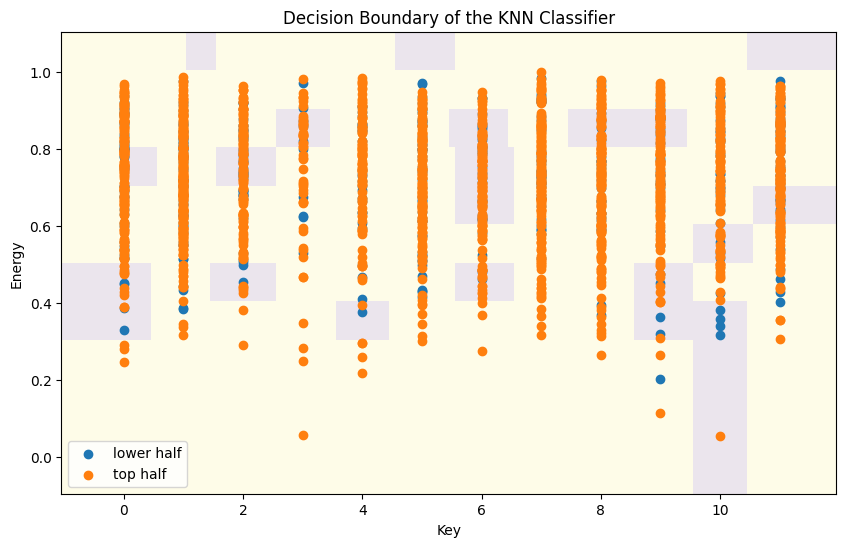

In [ ]:
# Make the same scatter plot of the training data

fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(spotify_df['key'].min() - 1, spotify_df['key'].max() + 1, 0.1),
                     np.arange(spotify_df['energy'].min() - 0.1, spotify_df['energy'].max() + 0.1, 0.1))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in spotify_df.groupby('top half'):
  ax.scatter(data["key"], data["energy"], label=['lower half', 'top half'][label])

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel("Key")
ax.set_ylabel("Energy")
ax.legend()
plt.show()

#### **Step #7: Evaluate your model**

Print the accuracy and confusion matrix for your model's performance on the test set.

<br>

**NOTE**: You can use `['top half', 'bottom half']` for the `display_labels` argument here.

In [ ]:
print("Accuracy Score: " + # COMPLETE THIS CODE

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(# COMPLETE THIS CODE

#### **Step #8: Use the model**

Use your model to predict whether the following songs are in the top hits.

1. We are given an song with `key = 3` and `energy = 0.8`. According to your KNN model, will this song be in the top half of hits?
2. We are given another song with `key = 4.5` and `energy = 0.45`. Will this song be a bust or a hit?
3. We are given an song with `key = 1` and `energy = 0.5`. Will this song be a bust or a hit?

In [ ]:
song = pd.DataFrame([[3, 0.8]], columns = ["key", "energy"])
prediction = # COMPLETE THIS CODE
print(prediction)

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

### **Reflection question**
Answer the following question: Do you think using only the two features `energy` and `key` is enough to predict whether or not a song will be a top hit?

### **Hyperparameter Tuning [OPTIONAL]**

Run the given code below to find the optimal k for our model. What is this k?

{1: 69.5, 3: 71.75, 5: 75.0, 7: 77.25, 9: 79.25, 11: 80.25, 13: 80.25, 15: 80.5, 17: 80.5, 19: 80.5, 21: 80.5, 23: 80.5, 25: 80.5, 27: 80.5, 29: 80.5, 31: 80.5, 33: 80.5, 35: 80.5, 37: 80.5, 39: 80.5, 41: 80.5, 43: 80.5, 45: 80.5, 47: 80.5, 49: 80.5}


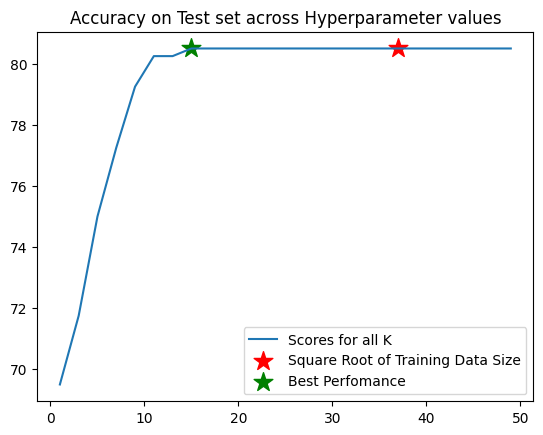

Top score of optimal classifier: 80.5
Best Value of N to use 15


In [ ]:
# Hyperparameter tuning
scores = {}
for n in range(1,50,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')

# ADDING THE PERFORMANCE FOR K = SQRT SIZE FOR REFERENCE
k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Best Value of K to use " + str(best_k))

<a name="p3"></a>

---
## **Part 3: Australia Dataset**
---
#### **About the Dataset**
Weather and humans' ability to forecast/predict it play a large role in many aspects of daily life. This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

The features are as follows:
* `Location`: the location of the weather station
* `WindSpeed`: the wind speed averaged over 10 minutes prior to 9am (in km/hr)
* `Humidity`: the humidity (percent) at 9am
* `Pressure`: atmospheric pressure reduced to mean sea level at 9am (in hundreds of hPa)
* `Temp`: temperature at 9am (in Celsius)
* `RainToday`: whether or not the rain/precipitation in the 24 hours to 9am exceeds 1mm (0: no, 1: yes)
* `RainTomorrow`: whether or not it rained at least 1mm the next day (0: no, 1: yes)

<br>

#### **Your Task**
* Build a model that can predict whether or not it will rain tomorrow.
* Build another model with the optimal hyperparameters and compare the accuracies.


<br>

**Load the code below before continuing.**

In [ ]:
url = "https://raw.githubusercontent.com/the-codingschool/TRAIN/main/australia/australia_weather.csv"

# COMPLETE THIS CODE

#### **Problem #3.1**

Create a KNN model with the hyperparameter `n_neighbors = 3` in order to predict whether or not it will rain tomorrow. Use all features except `Location` and `RainTomorrow`, and then train and evaluate the model using `accuracy_score` and the confusion matrix.

In [ ]:
features = australia_df.drop(['Location', 'RainTomorrow'], axis=1)
label = australia_df['RainTomorrow']

#split the train and test data
# COMPLETE THIS CODE

# import the KNN algorithm
# COMPLETE THIS CODE

# initialize
# COMPLETE THIS CODE

# fit
# COMPLETE THIS CODE

# predict
# COMPLETE THIS CODE

# Evaluation of accuracy
print("Accuracy Score: " + str(metrics.accuracy_score(# COMPLETE THIS CODE

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(# COMPLETE THIS CODE

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

<a name="p4"></a>

---
## **Part 4: [OPTIONAL] Homework Practice**
---

<a name="p4.1"></a>

---
### **Part 4.1: Zoo Animal Classification Dataset**
---

#### **About the Dataset**
The following dataset contains information on various zoo animals, including their characteristics and classifications. Our goal is to build a model that predicts the classification of an animal based on its features.

<br>

The labels you will be trying to predict are as follows:

* `1` -- **Mammals** (41 animals in this category): aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, cat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby, wolf.
* `2` -- **Birds** (20 animals in this category): chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren.
* `3` -- **Reptiles** (5 animals in this category): pitviper, seasnake, slowworm, tortoise, tuatara.
* `4` -- **Fish** (13 animals in this category): bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna.
* `5` -- **Amphibians** (4 animals in this category): frog, frog, newt, toad.
* `6` -- **Insects** (8 animals in this category): flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp.
* `7` -- **Invertebrates** (10 animals in this category): clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm.

<br>

The features are as follows (all features marked with an * is 1 if yes and 0 if no):


* `animal_name`: Name of the animal
* `hair`: Hair presence*
* `feathers`: Feather presence*
* `eggs`: Egg-laying ability*
* `milk`: Milk production ability*
* `airborne`: Ability to fly*
* `aquatic`: Ability to live in water*
* `predator`: Predatory behavior*
* `toothed`: Teeth presence*
* `backbone`: Backbone presence*
*  `breathes`: Ability to breathe*
* `venomous`: Venom presence*
* `fins`: Fin presence*
* `legs`: Number of legs (0, 2, 4, 5, 6, or 8)
* `tail`: Tail presence*
* `domestic`: Domestication status*
* `catsize`: Cat-like size*
* `class_type`: Numeric class identifier (1-7) as described above

#### **Step #1: Load the data**



In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"'

# COMPLETE THIS CODE

#### **Step #2: Decide independent and dependent variables**

Your goal is to predict `class_type` using all possible *numerical* features.


In [ ]:
features = # COMPLETE THIS CODE
label = # COMPLETE THIS CODE

#### **Step #3: Split data into training and testing data**

In [ ]:
X_train, X_test, y_train, y_test = # COMPLETE THIS CODE

#### **Step #4: Import your model**

In [ ]:
# COMPLETE THIS CODE

#### **Step #5: Initialize your model and set hyperparameters**

Initialize the KNN model, and set hyperparameter `n_neighbors = 3`.

In [ ]:
model = # COMPLETE THIS CODE

#### **Step #6: Fit your model, test on the testing data**

**NOTE**: Visualization would be quite tricky here since there are 16 features instead of just 2. So, do not worry about doing this here.

In [ ]:
model.# COMPLETE THIS CODE
pred = # COMPLETE THIS CODE

#### **Step #7: Evaluate your model**

Print the accuracy and confusion matrix for your model's performance on the test set.

<br>

**NOTE**: In this case, the labels are already the names of the classes as opposed to less meaningful numbers, so you do not need to supply a `display_labels` argument.

In [ ]:
print("Accuracy Score: ", # COMPLETE THIS CODE

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(# COMPLETE THIS CODE

<a name="p4.2"></a>

---
### **Part 4.2: Classifying Stars**
---
In this Part, we will use a dataset that contains data collected by astronomers about different classes of stars that have been observed. With KNN, you will use the size and temperature of stars to determine which class they may be from the following:

* `0`: Red Dwarf
* `1`: Brown Dwarf
* `2`: White Dwarf
* `3`: Main Sequence
* `4`: SuperGiants
* `5`: HyperGiants

#### **Step \#1: Load the data**



In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTCZgoegOHa49SFXYU-ZZTdCkgTp0sneU1BsEOa7vusjTXPPLcn0i3kXhX1nyqkApJHCKTkw0mWuWr4/pub?gid=753880827&single=true&output=csv'

# COMPLETE THIS CODE

#### **Step \#2: Decide independent and dependent variables**

Use the dataframe `stars_df` and subset your data into `inputs` and `output`.

<br>

The `inputs` will be `size` and `temperature`.

The `output` will be `class`.

In [ ]:
# COMPLETE THIS CODE

#### **Step \#3: Split data into train and test data**

Let's split your data into training and testing data. Since this is a small dataset, let's just reserve 10% of the data for testing.

In [ ]:
# COMPLETE THIS CODE

#### **Step \#4: Import your model**


In [ ]:
# COMPLETE THIS CODE

#### **Step \#5: Initialize your model and set hyperparameters**

Build your model with $K=7$.

In [ ]:
# COMPLETE THIS CODE

#### **Step \#6: Fit your model and make a prediction**

Train your model with the `x_train` and `y_train` training data and make predictions on `x_test`.

In [ ]:
# COMPLETE THIS CODE

#### **Create a visualization**

**Run the code below to visualize the decision boundary of this KNN model.**


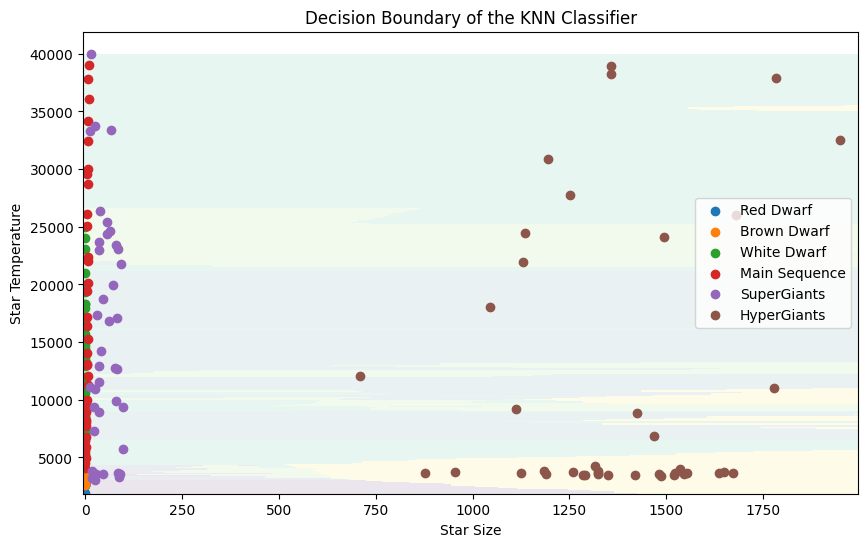

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(0, 2000, 10),
                     np.arange(1900, 40000, 100))
z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

labels = ['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'SuperGiants', 'HyperGiants']
for label, data in stars_df.groupby('class'):
  ax.scatter(data["size"], data["temperature"], label=labels[label])

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel("Star Size")
ax.set_ylabel("Star Temperature")
ax.legend()
plt.show()

#### **Step #7: Evaluate your model**

Print the accuracy and confusion matrix for your model's performance on the test set.

<br>

**NOTE**: It's not necessary to supply a `display_labels` argument, but if you are curious see if you can use the information provided in this Part to supply them.

In [ ]:
print("Accuracy Score: ", # COMPLETE THIS CODE

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(# COMPLETE THIS CODE

#### **Step \#8: Make predictions**


Astronomers have heard of your amazing ML model for predicting star types and want you to help them categorize new stars they have observed! For each problem below, use your KNN model to classify the stars based on the data given to you.


1. `size`: 708.9, `temperature`: 12100 (`[708.9, 12100]`)

2. `size`: 0.0998, `temperature`:  3484 (`[0.0998, 3484]`)

3. `size`: 6.39, `temperature`:  34190 (`[6.39, 34190]`)

4. `size`: 0.16, `temperature`: 2799 (`[0.16, 2799]`)

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

<a name="p4.3"></a>

---
### **Part 4.3: RGB Color Classification Dataset**
---

Visible colors of light (for humans) and digital colors can be represented in the form of RGB values. The **RGB color model** operates as an additive system where <font color="red">red</font>, <font color="green">green</font>, and <font color="#2964f0">blue</font> (**<font color="red">R</font><font color="green">G</font><font color="#2964f0">B</font>**) primary light colors combine in diverse ways to replicate a wide spectrum of colors.

Each of these primary colors is represented by an integer value between 0 and 255 (just under 256 or 2<sup>8</sup> on the binary number scale). A lower value means a lower intensity or darker color. Likewise, an RGB of (0, 0, 0) is black, while (255, 255, 255) is white. The closer the red, green, and blue values are to being equal, the more likely a color is to appear gray. For example, RGB(113, 113, 113) and RGB(207, 207, 207) are different shades of gray.

Without checking, what color would RGB(172, 145, 236) be? <br />That's a tough question to answer!

Naturally, we as humans often use names to describe colors as we see them. You may have grown up using crayons with names like *scarlet*, *dark purple*, or *yellow-orange*. But where is the line between *orange* and *yellow* drawn? Classifying colors under an umbrella label can be difficult and is often individually or even culturally subjective! This task becomes even more challenging for those with a form of color blindness.

Beyond the commonly known groupings of primary, secondary, and tertiary colors, [research](https://europepmc.org/backend/ptpmcrender.fcgi?accid=PMC1618485&blobtype=pdf) has found an optimitzed set of 11 distinct color categories for classification: <br />
> *Red, Orange, Yellow, Green, Blue, Purple, Pink, Brown, Black, Gray, White*


<br />

---

#### **About the Dataset**

This dataset contains 5053 RGB color samples that have been labelled into one of 11 different categories.

This **[Google Color Picker](https://www.google.com/search?rls=en&q=color+picker)** may be a handy tool to use throughout this section!

The features are as follows:

- `red` - RGB red value ( integer 0-255 )

- `green` - RGB green value ( integer 0-255 )

- `blue` - RGB blue value ( integer 0-255 )

- `label` - color category, there are 11 total:

    - *Red, Orange, Yellow, Green, Blue, Purple, Pink, Brown, Black, Gray, White*


<br>

#### **Your Task**
Using the RGB Color Classification dataset, you will do the following:
* Create a KNN model that can predict the categorization of a color based on its red, green, and blue values.
* Plot and compare the results and make note of your findings.


#### **Step #1: Load the data**



In [ ]:
url = "https://raw.githubusercontent.com/the-codingschool/TRAIN/main/color_classification/color_data.csv"

# COMPLETE THIS CODE

#### **Step #2: Create visualizations to get familiar with the data**

First, create either a bar graph or histogram to visualize the distribution of color categories in the dataset.

Challenge: If you can, try to color the bars the same as the corresponding label.

In [ ]:
colors = list(rgb_df['label'].unique())
total_num_of_each_color = [rgb_df['label'].value_counts()[c] for c in colors]

plt.axes().set_facecolor('lightgray')
plt.bar(# COMPLETE THIS CODE

# COMPLETE THIS CODE - axis labels


Since there are three separate values that make up an RGB color, let's use a **3D scatter plot** to visualize the spread of the data. We can color the points with either their color label or with the actual RGB hue if we condense the three values into a single representation.

- **`make_hex()`** - Takes a dataframe row (with the features ['red', 'green', 'blue']) as a parameter and returns the hexadecimal equivalent as a string. When used with the `df.apply()` method, it can create an entire new column of hex codes ready to be added to the dataframe as a new column.

  ```
  df['hex'] = df.apply(make_hex, axis=1)
  ```

  To learn more about the process of converting RGB to HEX, see the infographic below.

  <img src="https://raw.githubusercontent.com/the-codingschool/TRAIN/main/color_classification/RGB to HEX.jpg" width=600/>

In [ ]:
def make_hex(row):
  return '#%02X%02X%02X' % (row['red'], row['green'], row['blue'])

fig = plt.figure(figsize=(14,8), layout='tight')

# RGB-HEX Colors
ax = fig.add_subplot(121,projection='3d')
ax.scatter(rgb_df['red'], rgb_df['green'], rgb_df['blue'], c=rgb_df.apply(make_hex, axis=1), s=8, alpha=1.0)
ax.set_title('Actual Colors', fontweight='bold')
ax.set_xlabel('Red  ', fontweight='bold', color='red')
ax.set_ylabel('Green', fontweight='bold', color='green')
ax.set_zlabel('Blue ', fontweight='bold', color='blue')
ax.set_box_aspect(None, zoom=0.85)

# Label Colors
ax = fig.add_subplot(122,projection='3d')
ax.scatter(rgb_df['red'], rgb_df['green'], rgb_df['blue'], c=rgb_df['label'], s=8)
# COMPLETE THIS CODE - title, axis labels, aspect

plt.show()

#### **Step #3: Decide independent and dependent variables**

For this problem, we are interested in how the `red`, `green`, and `blue` values affect what name is given to a color. Since the `label` of a color is a string, we also need to *encode* the color labels by assigning a number to each one.




In [ ]:
encoded_labels = [colors.index(c) for c in rgb_df['label']]
features = # COMPLETE THIS CODE

#### **Step #4: Split data into training and testing data**


In [ ]:
# COMPLETE THIS CODE

#### **Step #5: Hyperparameter Tuning**

Complete and run the given code below to find the optimal k for our model. What is this k?

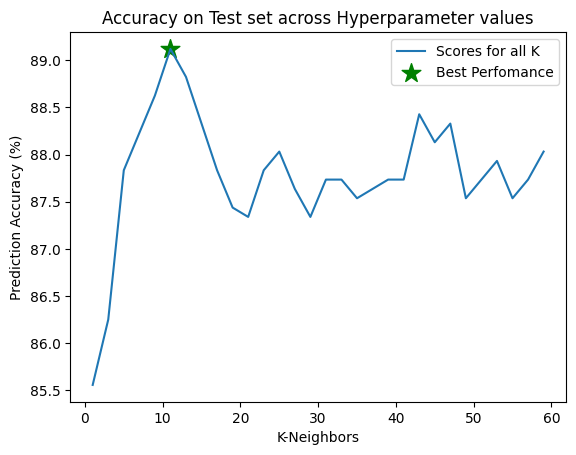

Top score of optimal classifier: 89.11968348170129
Best Value of K: 11


In [ ]:
scores = {}
for n in range(1,60,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train)
    pred = full_model.predict(X_test)
    scores[n] = sum(pred == y_test)/len(pred) * 100


plt.title("Accuracy on Test set across Hyperparameter values")
plt.plot(scores.keys(), scores.values(), label = 'Scores for all K')

top_score = max(scores.values())
best_k = {v:k for k,v in scores.items()}[top_score]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.xlabel('K-Neighbors')
plt.ylabel('Prediction Accuracy (%)')
plt.legend()
plt.show()

print("Top score of optimal classifier: " + str(top_score))
print("Best Value of K: " + str(best_k))

#### **Step #6: Initialize & Evaluate the model using the optimal k value**


After fitting your model and making a prediction, print the accuracy and confusion matrix for your model's performance on the test set.

In [ ]:
# COMPLETE THIS CODE

#### **Step #7: Visualize your results**

Analyzing colors can be an intensely visual process, and evaluating model predictions may heavily rely on visual confirmation. Because of this, it is incredibly helpful to have stylized outputs that reflect the actual color of the sample and the color of the label it has been assigned. The way we perceive colors is often subjective, and the boundary that separates one color from its neighbor on the spectrum isn't rigidly defined.

Your task is to compile the actual labels, predicted labels, and hex codes into a single dataframe as columns. Then we can use special output styling techniques to manually compare the actual and predicted labels.

In [ ]:
actual_labels = [colors[l] for l in y_test]   # return the encoded labels to the color names
predicted_labels = [# COMPLETE THIS CODE

results_df = X_test.copy()
results_df['actual'] = # COMPLETE THIS CODE
results_df['predicted'] = # COMPLETE THIS CODE
results_df['hex'] = # COMPLETE THIS CODE

results_df.head()

##### **Styled Table Output**

- `output_styling()` - Takes a feature column as a parameter and returns a list of styling instructions for each column value as strings. These styling instructions are CSS ([cascading style sheets](https://www.w3schools.com/css/css_intro.asp)) ***attribute:value*** pairs. The primary attributes to consider are:
    - **Background Color** `background-color` - Accepts hex codes (ex: #012D9C) and some standard [color names](https://developer.mozilla.org/en-US/docs/Web/CSS/named-color) (ex: 'red'). At a glance, the background should show us exactly what the sample color looks like *(hex code)*.
    - **Text Color** `color` - Accepts hex codes (ex: #012D9C) and some standard [color names](https://developer.mozilla.org/en-US/docs/Web/CSS/named-color) (ex: 'red').
    - **Text Alignment** `text-align` - Will align text to the left, right, or center of the cell.
  
  When the name of this function is used as a parameter in this method call `df.style.apply()` it is called on each feature column in `df`.

In [ ]:
def output_styling(column):
  if column.name == 'hex':
    return ['text-align: center; background-color: ' + val for val in column]
  if column.name not in ['red','green','blue']:
    return ['text-align: center; font-weight: bold; color: ' + val for val in column]
  return ['' for val in column]

results_df.style.apply(output_styling)

,red,green,blue,actual,predicted,hex
2638,163,245,72,Green,Green,#A3F548
4589,16,199,4,Green,Green,#10C704
798,67,189,237,Blue,Blue,#43BDED
3699,170,145,169,Gray,Purple,#AA91A9
1557,9,67,92,Blue,Blue,#09435C
465,82,169,128,Green,Green,#52A980
4127,177,170,46,Green,Green,#B1AA2E
915,210,130,229,Purple,Pink,#D282E5
4946,53,214,103,Green,Green,#35D667
4678,211,34,72,Red,Red,#D32248


---

 **[OPTIONAL]**

Make additional 3D scatter plots of the RGB color data used to test the model. Consider comparing the actual/predicted labels and the actual RGB color.

In [ ]:
fig = plt.figure(figsize=(17,8), layout='tight')

# Actual Label
ax = fig.add_subplot(131,projection='3d')
ax.scatter(# COMPLETE THIS CODE
ax.set_title('Actual Color Labels', fontweight='bold')
ax.set_xlabel('Red  ', fontweight='bold', color='red')
ax.set_ylabel(# COMPLETE THIS CODE
ax.set_zlabel(# COMPLETE THIS CODE
ax.set_box_aspect(None, zoom=0.85)

# Predicted Label
ax = fig.add_subplot(132,projection='3d')
# COMPLETE THIS CODE


# RGB-HEX Colors
ax = fig.add_subplot(133,projection='3d')
# COMPLETE THIS CODE


plt.show()

---

# End of Notebook

© 2025 The Coding School, All rights reserved